# Homework 5

# Problem 1: Scatterplot Matrices

Run the following code to download, import, and display a data set from the 2021 World Happiness Report. 

https://worldhappiness.report/ed/2021/

If you experience `ConnectionRefused` errors, you may instead 
copy the url into your browser and save the file manually


If you experience the following error:
`ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support`

You can either follow instructions in https://docs.anaconda.com/navigator/tutorials/manage-packages/ to install 'xlrd' package via Anaconda Navigator

**OR** just use the `happiness_downloaded.csv` file provided in Bruinlearn.

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

url = "https://happiness-report.s3.amazonaws.com/2021/DataForFigure2.1WHR2021C2.xls"
happiness = pd.read_excel(url)

In [2]:
happiness.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.8421,0.031646,7.904126,7.780075,10.775202,0.953603,72.000000,0.949268,-0.097760,0.185846,2.430343,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524,3.253415
1,Denmark,Western Europe,7.6195,0.034657,7.687428,7.551572,10.933176,0.954410,72.699753,0.945639,0.030109,0.178838,2.430343,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993,2.868296
2,Switzerland,Western Europe,7.5715,0.036243,7.642536,7.500463,11.117368,0.941742,74.400101,0.918788,0.024629,0.291698,2.430343,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019,2.839148
3,Iceland,Western Europe,7.5539,0.059373,7.670271,7.437528,10.877768,0.982938,73.000000,0.955123,0.160274,0.672865,2.430343,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940,2.966945
4,Netherlands,Western Europe,7.4640,0.027326,7.517559,7.410441,10.931812,0.941601,72.400116,0.913116,0.175404,0.337938,2.430343,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531,2.797818


In [3]:
happiness.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [4]:
# only take some of the columns
cols = happiness.columns[[0, 2, 13, 14, 15, 16, 17, 18]]
happiness = happiness[cols]

# add overall rank
happiness["Overall rank"] = range(1, len(happiness)+1) 

# renaming columns
cols = [c.replace("Explained by: ", "") for c in happiness.columns]
cols[0] = "Country or region"
cols[1] = "Score"
cols[2] = "GDP per capita"
happiness = happiness.rename(columns= dict(zip(happiness.columns, cols)))

# switching column order
cols = ["Overall rank"] + cols[:-1]
happiness = happiness[cols]

# save changed table to csv file
happiness.to_csv('happiness_report_2021.csv', header=True)

In [5]:
happiness

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.8421,1.446356,1.106192,0.740824,0.690577,0.124200,0.480524
1,2,Denmark,7.6195,1.501548,1.108008,0.762862,0.686160,0.207615,0.484993
2,3,Switzerland,7.5715,1.565899,1.079469,0.816415,0.653488,0.204040,0.413019
3,4,Iceland,7.5539,1.482190,1.172279,0.772319,0.697701,0.292526,0.169940
4,5,Netherlands,7.4640,1.501072,1.079151,0.753425,0.646585,0.302397,0.383531
...,...,...,...,...,...,...,...,...,...
144,145,Lesotho,3.5118,0.450848,0.730561,0.006992,0.405455,0.102819,0.015284
145,146,Botswana,3.4665,1.099198,0.724478,0.339868,0.538626,0.027394,0.088468
146,147,Rwanda,3.4147,0.363624,0.202183,0.406969,0.626681,0.227457,0.492669
147,148,Zimbabwe,3.1448,0.456724,0.648552,0.243230,0.358907,0.157088,0.075471


This is a `pandas` data frame. Observe the following: 

1. Each row corresponds to a country or region. 
2. The `Score` column is the overall happiness score of the country, evaluated via surveys. 
3. The other columns give indicators of different features of life in the country, including GDP, level of social support, life expectancy, freedom, generosity of compatriots, and perceptions of corruption in governmental institutions. 

 You can extract each of these columns using dictionary-like syntax: 
 
 ```python
 happiness["Score"]
 ```
 
 ```
0      7.769
1      7.600
2      7.554
3      7.494
4      7.488
       ...  
151    3.334
152    3.231
153    3.203
154    3.083
155    2.853
Name: Score, Length: 156, dtype: float64
 ```
 
Technically, this output is a `pandas` `Series`; however, in this context (and most others) it's fine to simply think of it as a 1-dimensional `np.array()`. 

## Part A

As a warmup, create a scatterplot of the overall `Score` column against a numerical column of your choice. Give the horizontal and vertical axes appropriate labels. Discuss your result. Is there a correlation? Does that correlation make sense to you? 

[Text(0.5, 0, 'Score'),
 Text(0, 0.5, 'GDP per capita'),
 Text(0.5, 1.0, 'GDP per Capita vs Score Graph')]

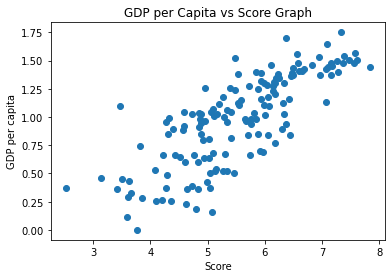

In [15]:
# plotting code here
fig, ax = plt.subplots()
ax.scatter(happiness["Score"], happiness["GDP per capita"])
ax.set(xlabel = "Score", ylabel = "GDP per capita", title = "GDP per Capita vs Score graph")

---

In general, we see that there seems to be a linearly increasing relationship between happiness score and GDP per capital.

---

## Part B

That plot you made may have helped you understand whether or not there's a relationship between the overall happiness score and the variable that you chose to plot. However, there are several variables in this data set, and we don't want to manually re-run the plot for each pair of variables. Let's see if we can get a more systematic view of the correlations in the data. 

Below, we wrote a function called `scatterplot_matrix()` for you, with arguments `cols` and `figsize`. The `cols` argument should be a list of strings, each of which are the name of one of the columns above, for example `cols = ["Score", "GDP per capita", "Social support"]`. This function creates a *scatterplot matrix*, like this:  

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="scatterplot_matrix.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other." width="400px">
</figure>

There is a separate scatterplot for each possible pair of variables. In fact, there are two: one where the first variable is on the horizontal axis, and one where it's on the vertical axis. The diagonal is empty, since there's no point in investigating the relationship between a variable and itself. 

### What you need to do: 
- Go through the provided code, understand what each line does, and write appropriate docstring and comments.
- To avoid redundancy, modify the code so that only half the plots are shown. In other words, keep only the plots above or below the diagonal. This should involve only a very minimal change to the provided code.
- In the next cell, test your code, several times if needed, and discuss the correlations you observe. Add code cells if needed to show multiple outputs. 

In [73]:
def scatterplot_matrix(cols, figsize):
    """
    This function displays a matrix of the relationship between two category columns in the happiness file in the form of a scatterplot graph.
    The final output will be a matrix of size len(cols) x len(cols).
Args: cols (list: column cateogories to be comparied)
      figsize (2x1 tuple: size of the figure)
    """
    # The final output will be a graph matrix of size n x n where n is the the number of columns to compare
    n = len(cols)   
    fig, ax = plt.subplots(n, n, figsize=figsize)
    
    #creates a nxn array with the correlation coefficient corresponding to each graph.
    coef_corr = [] 
    for i in range(n-1):
        coef_corr += [happiness[cols[i]]]
    coef_corr = np.corrcoef((coef_corr), happiness[cols[n-1]])
    # iterates through each row of our graph matrix
    for i in range(n):
        # iterates through each column of our graph matrix
        for j in range(n):
            # Displays the axis labels for each graph
            ax[i,j].set(title = cols[i], ylabel = cols[j])
            # display a scatterplot graph if the columns are not being compared to each other or if they have not been already compared before
            # also displays the correlation coeffecient to each displayed graph
            if i != j and j>=i:
                # draw the scatter points
                ax[i,j].scatter(happiness[cols[i]], happiness[cols[j]])
                ax[i,j].set(xlabel = r"$\rho$ = " + str(np.round(coef_corr[i,j], 2)))
                

    #  adds spacing for readability
    plt.tight_layout()
    plt.show()

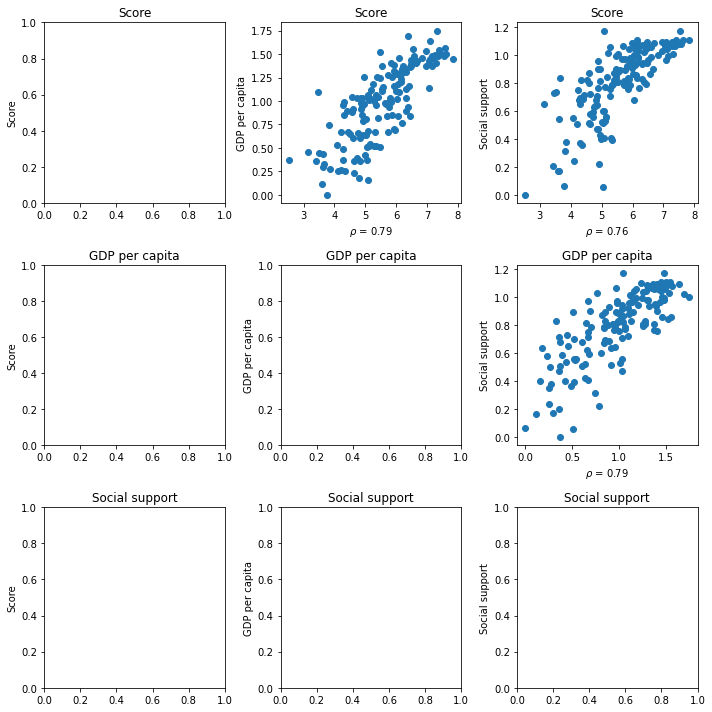

In [74]:
# test your code, several times if needed, and discuss the correlations you observe. 
# Add code cells if needed to show multiple outputs. 
scatterplot_matrix(["Score", 
        "GDP per capita", 
        "Social support"], (10,10))

For each graph, we see a correlation between each of the columns. When one column value increases, so does its compared value.

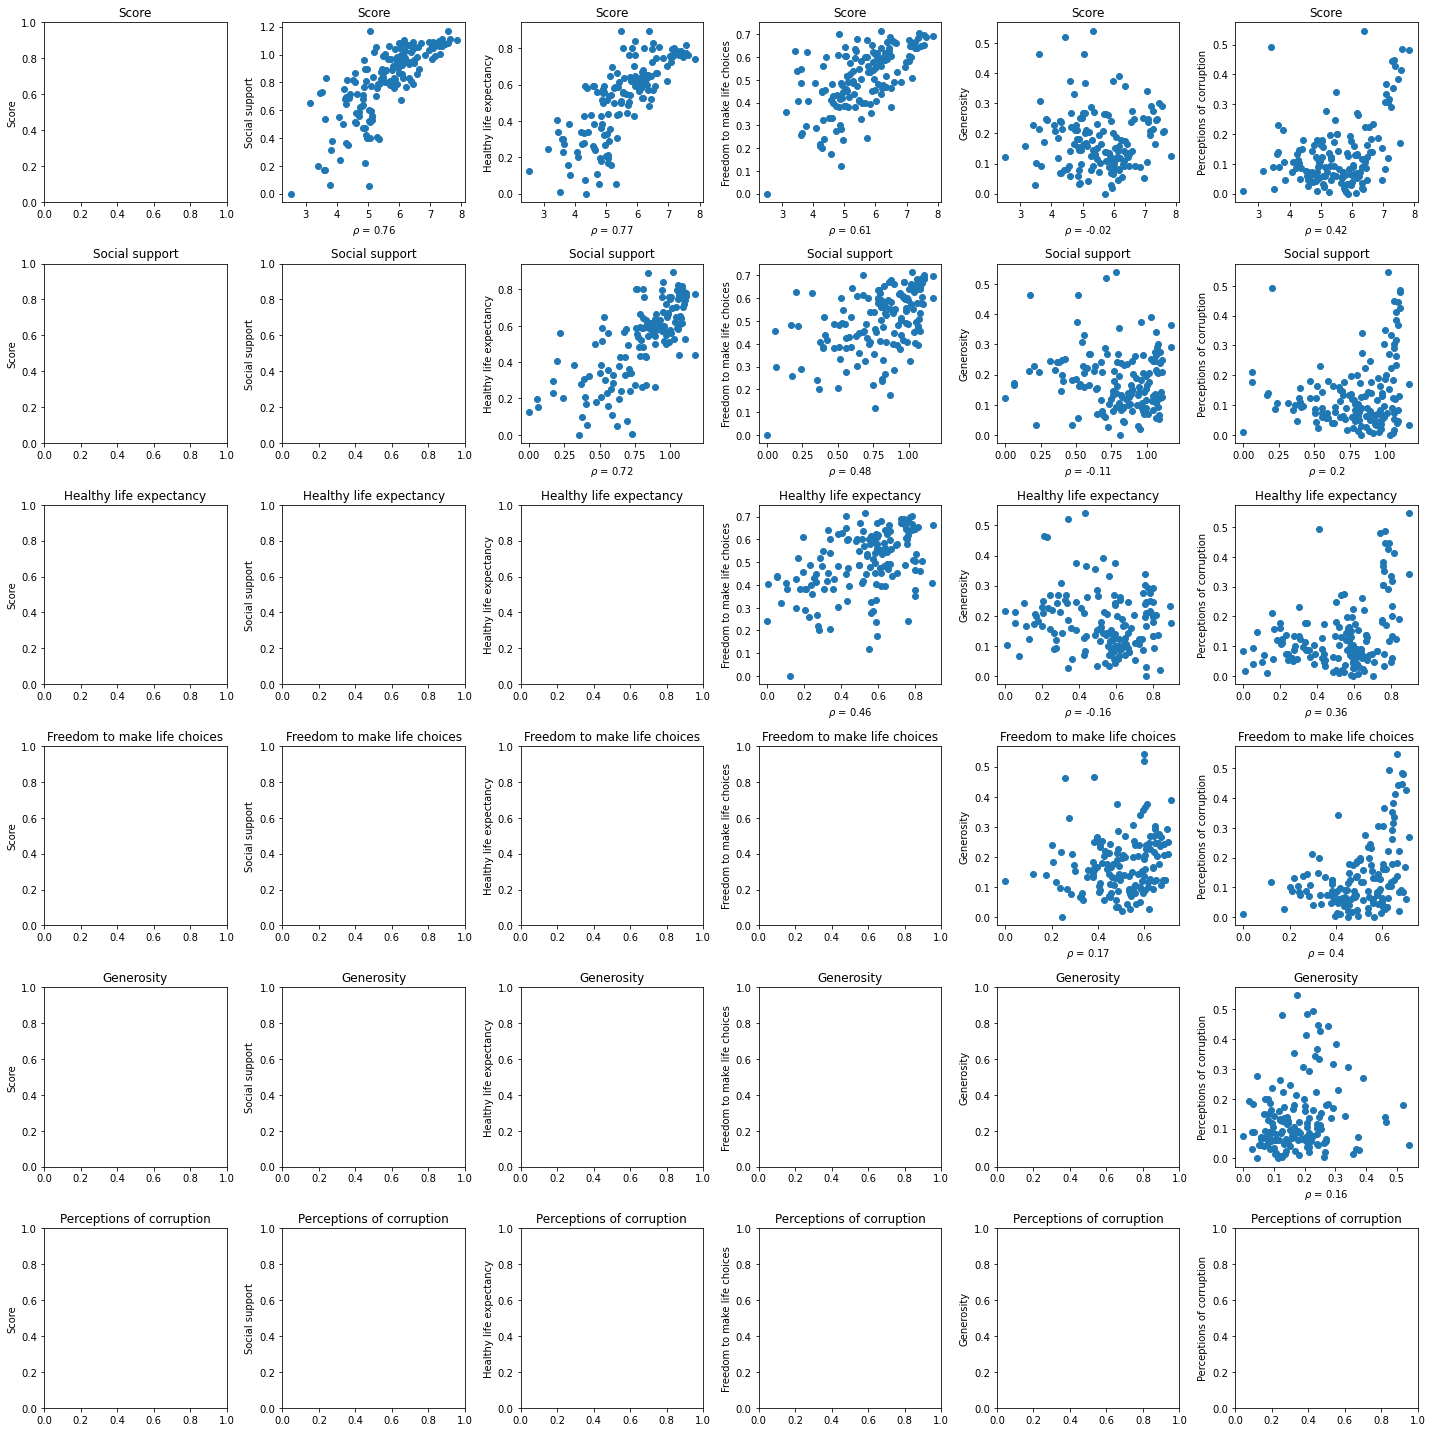

In [76]:
scatterplot_matrix(["Score","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"], (20,20))

## Part C

The *correlation coefficient* is a measure of linear correlation between two variables. The correlation coefficient between $X$ and $Y$ is high if $X$ tends to be high when $Y$ is, and vice versa. Correlation coefficients lie in the interval $[-1, 1]$. 

`numpy` provides a function to conveniently compute the correlation coefficient between two or more variables. Find it, and then use it to add "captions" (as horizontal axis labels) to each panel of your plot giving the correlation coefficient between the plotted variables. For example, 

```python
cols = ["Score", 
        "GDP per capita", 
        "Social support"]
           
scatterplot_matrix(cols,figsize = (7,7))
```

<figure class="image" style="width:70%">
  <img src="cor.png" alt="A 3x3 grid of scatterplots, showing relationships between Score and GDP, Score and Social support, and GDP and Social support. The diagonal is blank. All three variables are strongly correlated with each other. Correlation coefficients between 0.70 and 0.84 lie beneath each plot." width="400px">
</figure>

It's not required that you add the Greek letter $\rho$ (the classical symbol for correlation coefficients), but if you do want to, here's how. You can also tweak the rounding as desired.  

```python
ax.set(xlabel = r"$\rho$ = " + str(np.round(my_number, 2)))
```

You can add your code to the existing `scatterplot_matrix` function instead of writing a new function from scratch.

Run your code on several different subsets of the columns. Discuss your findings. What positive correlations do you observe? Do they make sense? Are there any negative correlations? Do the quantitative results match what you see "by eye"? 

If you were going to create a model to attempt to predict overall happiness from other indicators, which columns would you use? Why? 

---

While we saw significant correlation between some columns like GDP per capita and social support, some graphs such as Score vs Generosity had negative correlation.
This means shows that some variables are better at predicting happiness score than others and if we were to create a prediction model, then we should use indicators with a higher correlation coefficient.

---

# Problem 2: Plotting Time Series

Run the following code to download two time series data sets: 
- Historical data on the Dow Jones Industrial Average (a composite performance measure of the US stock market), retrieved from Yahoo Finance. 
- Cumulative COVID19 cases over time, from the [New York Times](https://github.com/nytimes/covid-19-data). 

In [106]:
# run this block
# if you experience ConnectionRefused errors, you may instead 
# copy the urls into your browser, save the files as DJI.csv 
# and COVID.csv respectively in the same directory as the notebook.
# Then, in the lines using the function pd.read_csv(), replace 
# the url with "DJI.csv" and "COVID.csv" 
import datetime

url = "https://query1.finance.yahoo.com/v7/finance/download/%5EDJI?period1=1580750232&period2=1712372632&interval=1d&events=history&includeAdjustedClose=true"
DJI = pd.read_csv(url)
DJI['date'] = pd.to_datetime(DJI['Date'])
DJI.drop(["Date"], axis = 1)

url = "https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv"
COVID = pd.read_csv(url)
COVID['date'] = pd.to_datetime(COVID['date'])

## Part A

The series `COVID['cases']` is essentially a `numpy` array containing the cumulative case counts over time. The COVID19 case data  is cumulative, but we would like to see the number of new cases per day (i.e. as in [this kind of plot](https://www.google.com/search?q=covid+stats)). Check the documentation for the `np.diff` function and figure out what it does. Use it appropriately to construct a new array, called `per_day`, giving the number of new cases per day. Then, make a new array called `per_day_date` that gives the appropriate date for each case count. In particular, you will need to ensure that `per_day` and `per_day_date` have the same shape. 

In [107]:
# your solution here
per_day = np.diff(COVID["cases"])
per_day_date = COVID["date"][1:]

## Part B

Create a figure with two very wide axes, one on top of the other (i.e. two rows, one column). Use the `sharex` argument of `plt.subplots()` to ensure that these two plots will share the same horizontal axis. 

Then: 

1. On the upper axis, plot the Dow Jones Industrial Average over time. For the horizontal axis use `DJI['date']`; the for the vertical use `DJI['Close']`. 
2. On the lower axis, plot the variables `per_day_date` and `per_day` to visualize the progress of the COVID19 pandemic over time. Use a different color for the time series. 

Give your plot horizontal and vertical axis labels. 

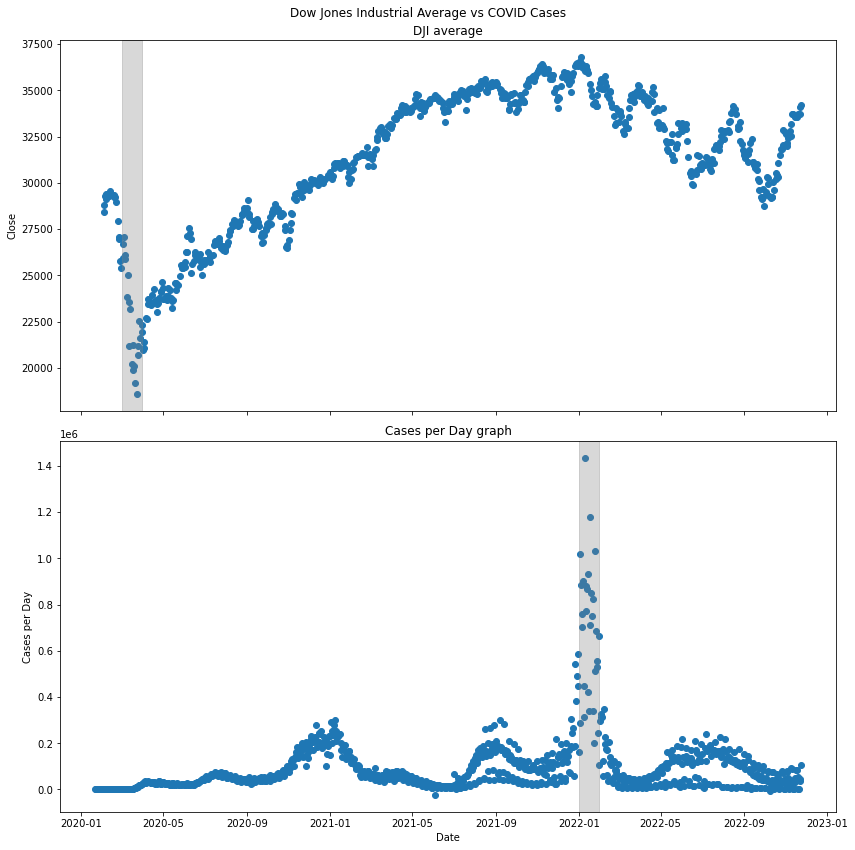

In [115]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (12,12))
fig.suptitle("Dow Jones Industrial Average vs COVID Cases")
ax[0].scatter(DJI["date"], DJI["Close"])
ax[0].set(ylabel = "Close", title = "DJI average")
ax[1].scatter(per_day_date, per_day)
ax[1].set(ylabel = "Cases per Day", xlabel = "Date", title = "Cases per Day graph")
ax[0].axvspan(datetime.datetime(2020,3,1),
              datetime.datetime(2020,3,30), 
              alpha = .3, 
              color = "gray")
ax[1].axvspan(datetime.datetime(2022,1,1),
              datetime.datetime(2022,1,30), 
              alpha = .3, 
              color = "gray")
plt.tight_layout()
plt.show()

## Part C

The command 

```
ax[0].axvspan(datetime.datetime(2020,6,1),
              datetime.datetime(2020,6,30), 
              alpha = .3, 
              color = "gray")
```

will add a simple rectangular shade which can be used to highlight specific portions of a time-series. In the given code, this shade runs through the month of June 2020. Add at least two such rectangular shades to your figure corresponding to important time intervals. You can put two shades on one axis, or one on each. If you're not sure what time periods are important, just choose intervals at random. Feel free to modify the color and transparency as desired. You can modify your figure code from Part B -- no need for copy/paste. 

## Part D

The command 

```
ax[0].text(datetime.datetime(2020,9,15), 
           22000, 
           "penguins?\npenguins!")
```

will add a fun text annotation to your plot, with the first letter in horizontal position corresponding to September 15th, and at vertical position 22,000. Annotate each of your shaded regions with a few words describing their significance. Again, just modify your Part B code. 

## Part E

Add an overall title, spruce up your axis labels, and add anything else you think will make the plot look good. Again, you can just modify your Part B code, without copy/paste. 

Then, submit a job application at www.FiveThirtyEight.com and show Nate Silver your cool data visualization.  

# Problem 3

Gapminder is a foundation, based on Sweden, that aims to enhance basic awareness of basic facts about the socioeconomic global world. As part of their efforts, they collect detailed statistics on life expectancy, population, and GDP, sometimes going back over many years. 

Here, we'll work with an excerpt of the Gapminder data. This excerpt has been packaged up and made available via Jenny Bryan's [`gapminder` repo](https://github.com/jennybc/gapminder) on Github. 

Run the code below to retrieve the data and take a look. As usual, you can also directly download the data by pasting the url into your browswer, saving the file, and reading it in locally via `pandas.read_csv`. 

In [116]:
import pandas as pd
        
url = "https://philchodrow.github.io/PIC16A/datasets/gapminder.csv"
gapminder = pd.read_csv(url)
gapminder

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623


## Part A

Use the `gapminder` data to create the folowing visualization. Here, each trendline corresponds to a distinct country, which in turn lies on the stated continent. 

<figure class="image" style="width:100%">
  <img src="https://raw.githubusercontent.com/PhilChodrow/PIC16A/master/homework/gapminder_p1.png" alt="">
  <figcaption><i></i></figcaption>
</figure>

Feel free to modify aesthetic details of the plots, such as the colors. 

**Hint**: I suggest the following approach:

```
fig, ax = plt.subplots(1, 5, figsize = (15, 3), sharey = True)

colors = {...}

axis_index = {...}

for continent, df_continent in gapminder.groupby(['continent']):
    # run this code to understand what's happening 
    # print(continent, df_continent.shape)
    for country, df_country in df_continent.groupby(['country']):
        # print(country, df_country.shape)
        
        # some plotting code here
```

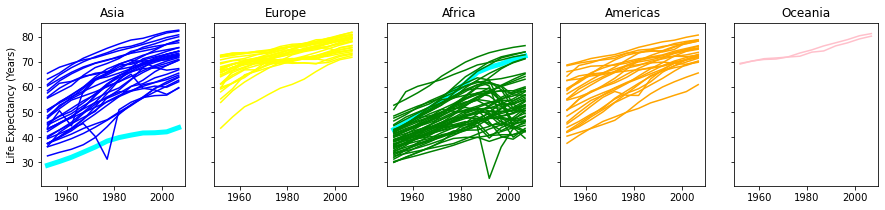

In [163]:
fig, ax = plt.subplots(1, 5, figsize = (15, 3), sharey = True)

colors = {0:"Blue", 1:"Yellow",2:"Green",3:"Orange",4: "Pink"}

axis_index = {"Asia":0 ,"Europe":1,"Africa":2,"Americas":3 ,"Oceania":4}
countries = ["Algeria", "Afghanistan"] # Countries from two different continents which are made to stand out(via thicker, aqua colored line)
for continent, df_continent in gapminder.groupby(['continent']):
    # run this code to understand what's happening 
    #print(continent, df_continent.shape)
    ax[axis_index[continent]].set(title = continent)
    for country, df_country in df_continent.groupby(['country']):
        #print(country, df_country.shape)
        if country in countries:
            ax[axis_index[continent]].plot(df_country["year"], df_country["lifeExp"], color = "aqua", linewidth = 5, label = country)
        else:
            ax[axis_index[continent]].plot(df_country["year"], df_country["lifeExp"], color = colors[axis_index[continent]])
            
ax[0].set(ylabel = "Life Expectancy (Years)")
plt.show()

## Part B

Pick two countries from two different continents (e.g. Korea and Germany) and make those lines stand out in your plot in two different ways. How you do that is up to you - you can change the thickness, color, opacity, linestyles, marker, etc, or even add an arrow pointing to it. There should be a text label somewhere that indicates which country it is. No need to copy/paste, you can alter the original code from the previous part.